
# Metrics

## Data

### Close value

In [1]:
import sys

sys.path.append('..')
from timeseries.timeseries import StockMarketSeries
from timeseries.utils import SeriesColumn
from metrics.utils import MetricLevel
from metrics.utils import Sensitiveness
from metrics.utils import Strength
from metrics.utils import Incomplete

stock = StockMarketSeries()
time_series_start = 0
time_series_end = 300
adobe = stock.prepare_time_series("Adobe", "../data/adobe.csv", time_series_start, time_series_end,
                                  {Strength.WEAK: 0.7, Strength.MODERATE: 3.0, Strength.STRONG: 7.0})
adobe_close = stock.create_single_series(SeriesColumn.CLOSE.value)

<class 'pandas.core.series.Series'>


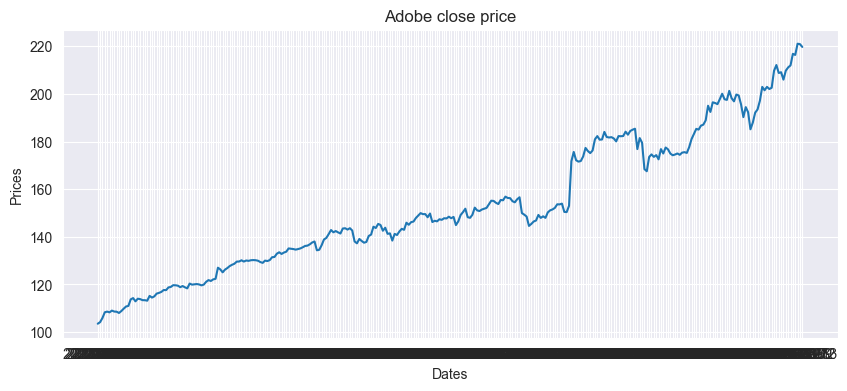

In [2]:
stock.plot_single_series(adobe_close, SeriesColumn.CLOSE)

### Other values

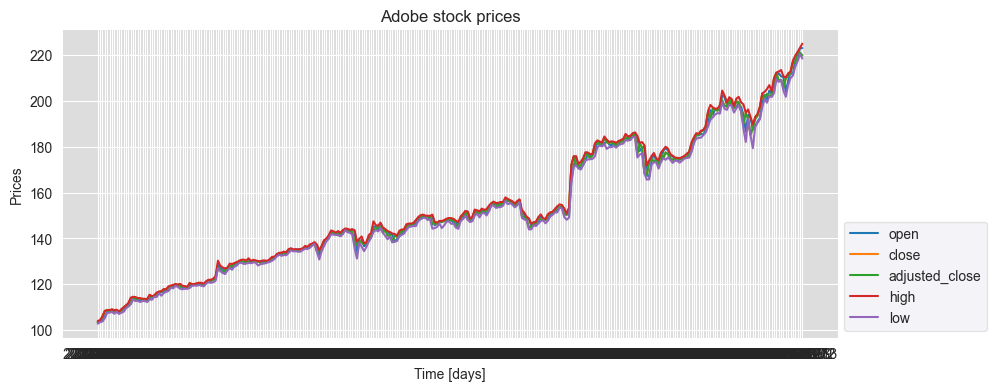

In [3]:
stock.plot_multiple_series("stock prices",
                           open=stock.series[SeriesColumn.OPEN], close=stock.series[SeriesColumn.CLOSE],
                           adjusted_close=stock.series[SeriesColumn.ADJ_CLOSE], high=stock.series[SeriesColumn.HIGH],
                           low=stock.series[SeriesColumn.LOW])

## Correctness metric

### Add noise

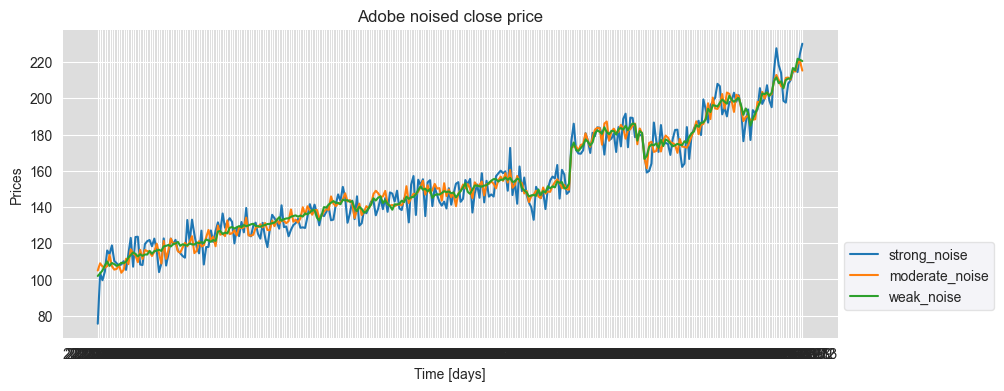

In [4]:
stock.plot_multiple_series("noised close price",
                           strong_noise=stock.series_noised[Strength.STRONG][SeriesColumn.CLOSE],
                           moderate_noise=stock.series_noised[Strength.MODERATE][SeriesColumn.CLOSE],
                           weak_noise=stock.series_noised[Strength.WEAK][SeriesColumn.CLOSE])

### Heinrich's correctness metric on values

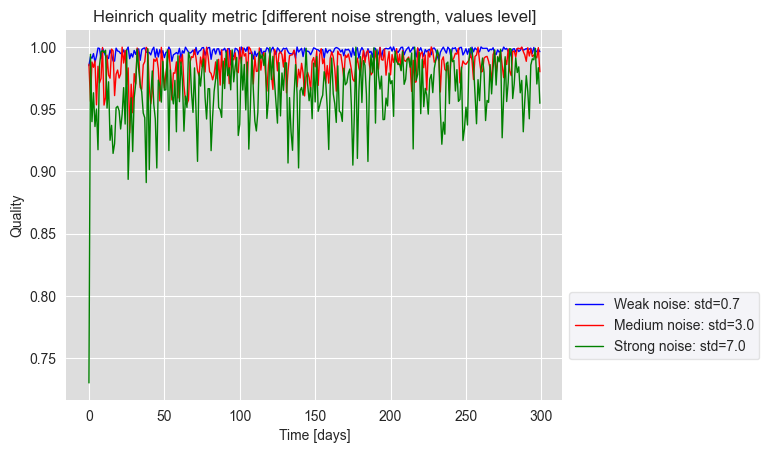

In [5]:
from correctness import HeinrichCorrectnessMetric
from metrics.utils import QualityDifferencesSource

heinrich = HeinrichCorrectnessMetric(
    alpha={Sensitiveness.SENSITIVE: 0.1, Sensitiveness.MODERATE: 0.3, Sensitiveness.INSENSITIVE: 1.0})

weak, moderate, strong = heinrich.values_qualities(stock, SeriesColumn.CLOSE, is_alpha=False, are_different_noises=True)
heinrich.draw_heinrich_qualities(stock, weak, moderate, strong, QualityDifferencesSource.NOISE_STRENGTH, MetricLevel.VALUES)

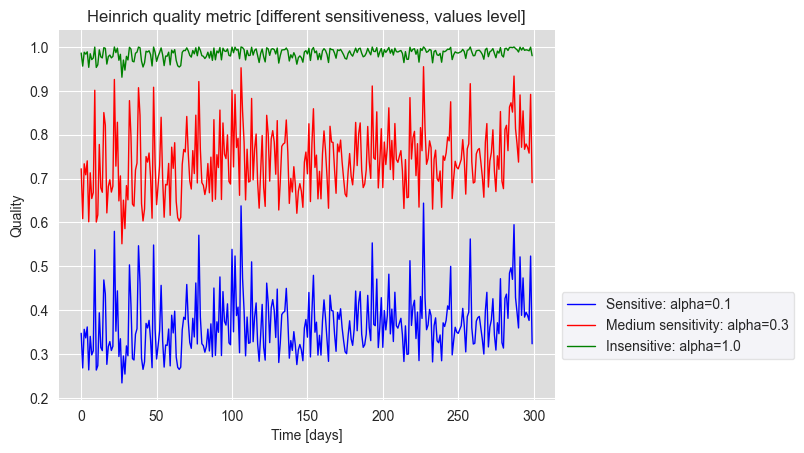

In [6]:
sensitive, medium, insensitive = heinrich.values_qualities(stock, SeriesColumn.CLOSE, is_alpha=True, are_different_noises=False)
heinrich.draw_heinrich_qualities(stock, sensitive, medium, insensitive, QualityDifferencesSource.SENSITIVENESS, MetricLevel.VALUES)

### Heinrich's correctness metric on tuples

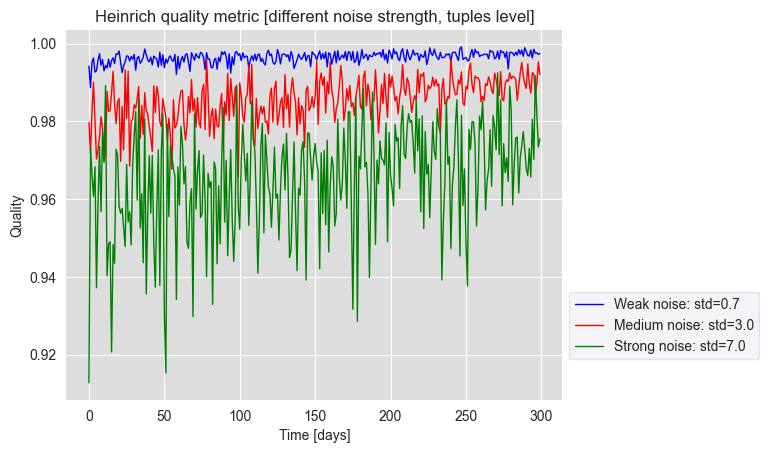

In [7]:
adobe_tuple_weights = [0.2, 0.2, 0.25, 0.15, 0.15, 0.05]

weak, moderate, strong = heinrich.tuples_qualities(stock, adobe_tuple_weights, is_alpha=False, are_different_noises=True)
heinrich.draw_heinrich_qualities(stock, weak, moderate, strong, QualityDifferencesSource.NOISE_STRENGTH, MetricLevel.TUPLES)

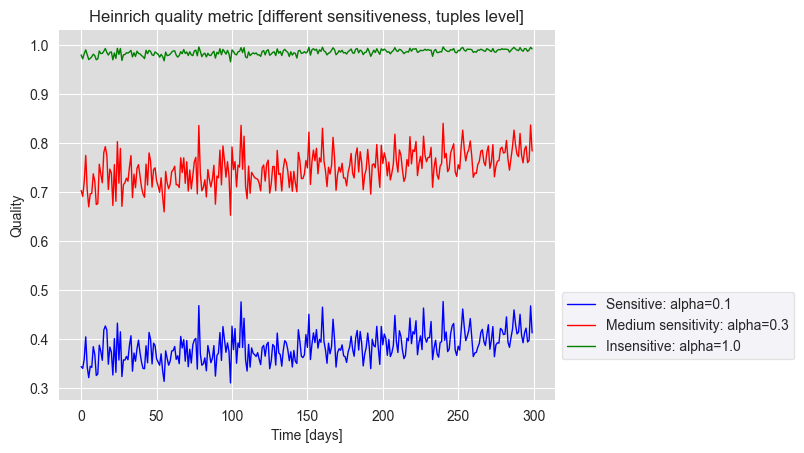

In [8]:
sensitive, medium, insensitive = heinrich.tuples_qualities(stock, adobe_tuple_weights, is_alpha=True, are_different_noises=False)
heinrich.draw_heinrich_qualities(stock, sensitive, medium, insensitive, QualityDifferencesSource.SENSITIVENESS, MetricLevel.TUPLES)

### Heinrich's correctness metric on relation

In [9]:
weak_noise, moderate_noise, strong_noise = heinrich.relation_qualities(stock, adobe_tuple_weights, is_alpha=False, are_different_noises=True)

print("Quality differences due to different noise levels")
print(f"Quality (weak noise): {weak_noise}")
print(f"Quality (moderate noise): {moderate_noise}")
print(f"Quality (strong noise): {strong_noise}")

Quality differences due to different noise levels
Quality (weak noise): 0.9964606389846153
Quality (moderate noise): 0.985399563029826
Quality (strong noise): 0.965276237406962


In [10]:
sensitive_quality, moderate_quality, insensitive_quality = heinrich.relation_qualities(stock, adobe_tuple_weights, is_alpha=True, are_different_noises=False)

print("Quality differences due to different sensitiveness levels")
print(f"Quality (sensitive): {sensitive_quality}")
print(f"Quality (medium sensitiveness): {moderate_quality}")
print(f"Quality (insensitive): {insensitive_quality}")

Quality differences due to different sensitiveness levels
Quality (sensitive): 0.38503411485846056
Quality (medium sensitiveness): 0.7485889985503845
Quality (insensitive): 0.985399563029826


## Completeness metrics

### Add incompleteness

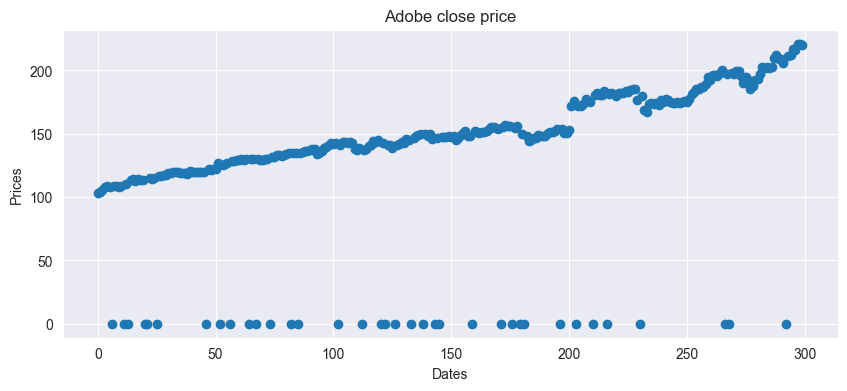

In [11]:
from metrics.completeness import BlakeCompletenessMetric

adobe_close_incomplete = stock.series_incomplete[Incomplete.MODERATELY][SeriesColumn.CLOSE]
stock.plot_single_series(adobe_close_incomplete, SeriesColumn.CLOSE, plot_type="o")

### Blake's completeness metric on values

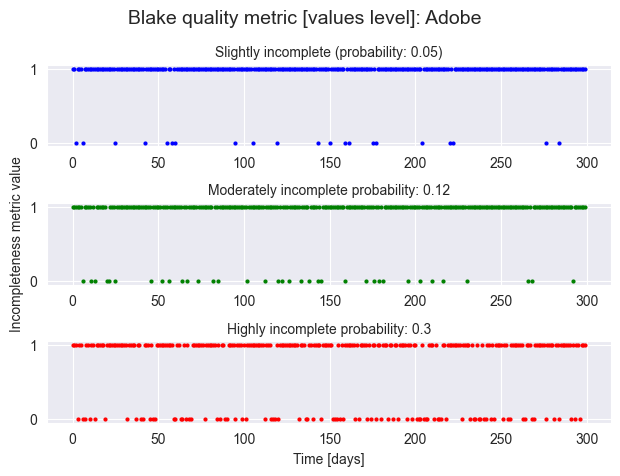

In [12]:
blake = BlakeCompletenessMetric()
qualities_first, qualities_second, qualities_third = blake.values_qualities(stock, SeriesColumn.CLOSE)
blake.draw_blake(stock, qualities_first, qualities_second, qualities_third, MetricLevel.VALUES)

### Blake's completeness metric on tuples

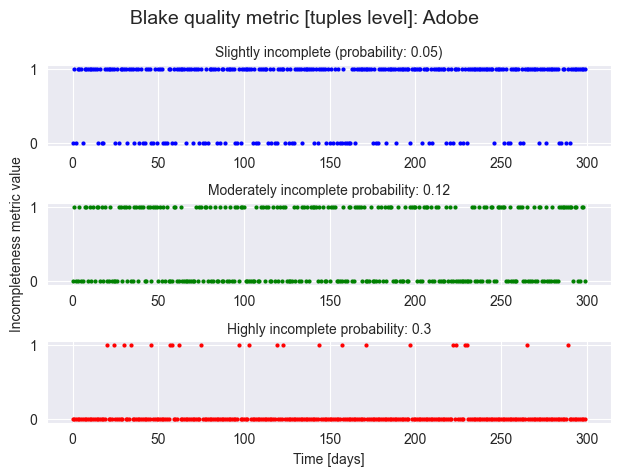

In [13]:
qualities_first, qualities_second, qualities_third = blake.tuples_qualities(stock)
blake.draw_blake(stock, qualities_first, qualities_second, qualities_third, MetricLevel.TUPLES)

### Blake's completeness metric on relation

In [14]:
qualities_first, qualities_second, qualities_third = blake.relation_qualities(stock)

print("Quality differences due to different incompleteness levels")
print(f"Blake's slightly incomplete data quality: {qualities_first}")
print(f"Blake's moderately incomplete data quality: {qualities_second}")
print(f"Blake's highly incomplete data quality: {qualities_third}")

Quality differences due to different incompleteness levels
Blake's slightly incomplete data quality: 0.7166666666666667
Blake's moderately incomplete data quality: 0.45666666666666667
Blake's highly incomplete data quality: 0.07666666666666666
